In [1]:
import numpy as np
import xarray as xr
from pathlib import Path
from itertools import product
# regridding
import xesmf as xe
# plotting
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as crs
from cartopy import feature as cfeature
from textwrap import wrap
# for clipping
import rioxarray

In [2]:
# path to observation datasets
path_data = "/mnt/d/NLeSC/BETA/EUCP/Data_Catalogue/data_Petter_Lind"

In [3]:
# alias of regions
regions_name_dict = {
  "nwe-3": "NW",
  "swe-3": "SW",
  "see-3": "SE",
  "ceu-3": "C",
  "cee-3": "CE",
  "neu-3": "N",
  "alp-3": "AL",
}

# define geometries for clipping by regions
regions = {
  "NW": [
    {
      'type': 'Polygon',
      'coordinates': [[[-8.0, 40.4], [11.0, 40.4], [15.2, 58.6], [-12.5, 58.6], [-8.0, 40.4]]]
    }
  ],
  "SW": [
    {
      'type': 'Polygon',
      'coordinates': [[[-10, 30], [7.4, 33], [5.7, 48.9], [-15, 45.4], [-10, 30]]]
    }
  ],
  "SE": [
    {
      'type': 'Polygon',
      'coordinates': [[[12.5, 34.3], [28.5, 34.3], [29.4, 40.9], [11.5, 40.9], [12.5, 34.3]]]
    }
  ],
  "C": [
    {
      'type': 'Polygon',
      'coordinates': [[[5.0, 44.5], [18.0, 45.5], [18.0, 56.0], [1.0, 53.0], [5.0, 44.5]]]
    }
  ],
  "CE": [
    {
      'type': 'Polygon',
      'coordinates': [[[17.8, 41.5], [31.3, 41.5], [32.8, 51.6], [16.4, 51.6], [17.8, 41.5]]]
    }
  ],
  "N": [
    {
      'type': 'Polygon',
      'coordinates': [[[1, 50.7], [26.7, 49.7], [44.1, 70.6], [-9.4, 72.6], [1, 50.7]]]
    }
  ],
  "AL": [
    {
      'type': 'Polygon',
      'coordinates': [[[1, 40], [17, 40], [17, 50], [1, 50], [1, 40]]]
    }
  ]
}

In [4]:
def diff_obs_model(infile, variable, season):
    """Compute the difference between observation and model outputs.
    """
    # load the input data
    model_data = xr.open_dataset(infile)
    # get the correct observation data
    if variable == "pr":
        obs_data = xr.open_dataset(Path(path_data, "OBS", "EOBS20_seasonal_cycle_pr_day_mean_native_grid_1980-2010_ANN.nc"))
    elif variable == "tas":
        obs_data = xr.open_dataset(Path(path_data, "OBS", "EOBS20_seasonal_cycle_tas_day_mean_native_grid_1980-2010_ANN.nc"))
    #############################################################
    ### regridding from model native grid to observation grid ###
    #############################################################
    # mask input data and observation data
    model_data['mask'] = xr.where(~np.isnan(model_data[f"{variable}"].sel(season=season)), 1, 0)
    obs_data['mask'] = xr.where(~np.isnan(obs_data[f"{variable}"].sel(season=season)), 1, 0)
    # create regridder
    regridder = xe.Regridder(model_data, obs_data, "bilinear")
    # use the regridder to regrid data
    model_data_regrid = regridder(model_data[f"{variable}"])
    ###############################################################
    ### compute difference between model output and observation ###
    ###############################################################
    diff_data = model_data_regrid - obs_data[f"{variable}"]

    return diff_data

In [6]:
ncfile = "/mnt/d/NLeSC/BETA/EUCP/Data_Catalogue/data_Petter_Lind/CPM/pr/alp-3_cclm_ec-earth_his_seasonal_cycle_pr_D_sum_mean_native_grid_1996-2005_ANN.nc"
diff_data = diff_obs_model(ncfile, "pr", "DJF")

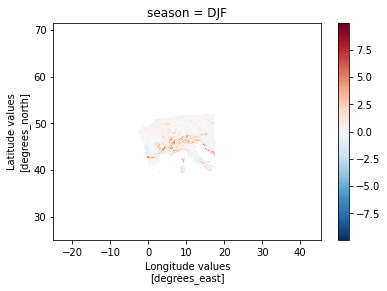

In [7]:
diff_data.sel(season="DJF").plot()

In [8]:
diff_data

<xarray.DataArray (season: 4, lat: 465, lon: 705)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
  * lon      (lon) float64 -24.95 -24.85 -24.75 -24.65 ... 45.25 45.35 45.45
  * lat      (lat) float64 25.05 25.15 25.25 25.35 ... 71.15 71.25 71.35 71.45

In [9]:
diff_data.rio.write_crs("EPSG:4326", inplace=True)

<xarray.DataArray (season: 4, lat: 465, lon: 705)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * season       (season) object 'DJF' 'MAM' 'JJA' 'SON'
  * lon          (lon) float64 -24.95 -24.85 -24.75 -24.65 ... 45.25 45.35 45.45
  * lat          (lat) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
    spatial_ref  int64 0

In [10]:
clipped_data = diff_data.rio.clip(regions["AL"], "EPSG:4326", all_touched=True)

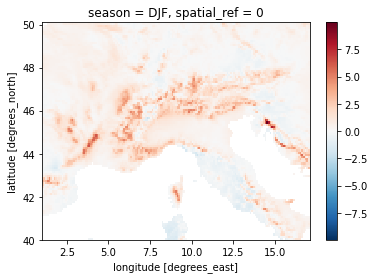

In [11]:
clipped_data.sel(season="DJF").plot()

(0.9998603869882405, 17.099860322580774, 39.99986010236326, 50.09985968329349)

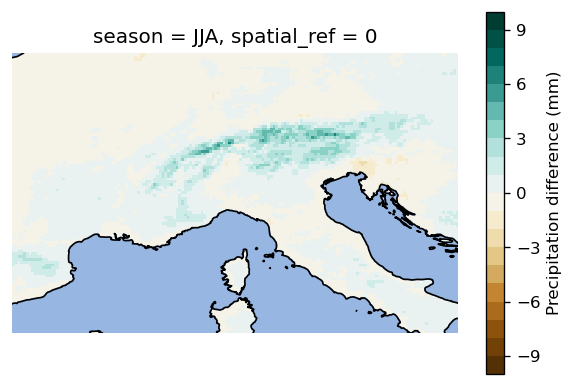

In [16]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(111, projection=crs.PlateCarree())
levels = np.arange(-10, 11, 1)
clipped_data.sel(season="JJA").plot(ax=ax, levels=levels, cmap="BrBG",
                     cbar_kwargs={'label': 'Precipitation difference (mm)',
                                  'extend': 'neither'})
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.coastlines(zorder=3)
ax.axis('off')
